# ADS500B
## House Sales Washington

This dataset contains details of house sales in neighborhoods of King County, Washington. 
It includes data for houses sold between May 2014 and May 2015.  

Origin: Kaggle
File Type: CSV
File Size: 2.5 MB
Modeling Problem: Regression
Missing Values: Yes

Attributes:
id - a numerical identity field for each house sale 

date - date when the house is sold

price - house sale price amount in US dollars (dependent variable)

bedrooms - number of bedrooms in the house

bathrooms - number of bathrooms in the house

sqft_living - living area in square feet

sqft_lot - total lot area in square feet

floors - number of floors in the house

waterfront - binary field, 1 if the house has a waterfront, 0 for no waterfront

view - binary field, 1 if the house has a view, 0 for no view

condition - a number denoting the condition of the house

grade - a number denoting the grade of the house

sqft_basement - area in square feet if the house has a basement

yr_built - in which year is the house built

yr_renovated - year when a house is renovated, 0 if not renovated

zipcode - house location zipcode in the county

lat - latitude cooridnate 

long - longitude coordinate

# Section 1 - Data Importing and Pre-processin

## Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used

In [2]:
#Dependencies
import numpy as np
import pandas as pd
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data is stored in a CSV, it is imported in to a DataFrame using read_csv, no arguments where required

In [3]:
#Read CSV to DF
houseSalesDF = pd.read_csv('house_sales.csv')
houseSalesDF

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


*Bedrooms* and *Date* are converted to proper Datatypes

In [4]:
#Check duplicate values
duplicate = houseSalesDF[houseSalesDF.duplicated()]
duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There is no duplicate value in the dataset

In [5]:
#Convert bedrooms to int
houseSalesDF['bedrooms'] = houseSalesDF['bedrooms'].astype('Int64')

In [6]:
#Convert Date columne to Datetime date type
houseSalesDF.loc[:,'date'] = pd.to_datetime(houseSalesDF.loc[:,'date'])

In [7]:
#Checking the data types
houseSalesDF.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  Int64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [8]:
#Count of variables by data type
houseSalesDF.dtypes.value_counts()

int64             12
float64            7
Int64              1
datetime64[ns]     1
dtype: int64

In [9]:
#Shape of initial data set
dfShape = houseSalesDF.shape
print('Housing DF -> ' + str(dfShape[0]) + ' row, and ' + str(dfShape[1]) + ' columns' )

Housing DF -> 21613 row, and 21 columns


In [10]:
#Checking the missing/null values
houseSalesDF.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
#Checking percantage of null values
round(houseSalesDF.isnull().sum() / dfShape[0] *100,2)

id               0.00
date             0.00
price            0.00
bedrooms         5.25
bathrooms        4.94
sqft_living      5.14
sqft_lot         4.83
floors           0.00
waterfront       0.00
view             0.00
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    0.00
yr_built         0.00
yr_renovated     0.00
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
dtype: float64

In [12]:
#DataFrame for Float variables
housesFloat = houseSalesDF.select_dtypes(include=['float64'])
housesFloat

,price,bathrooms,sqft_living,sqft_lot,floors,lat,long
0,221900.0,1.00,1180.0,5650.0,1.0,47.5112,-122.257
1,538000.0,2.25,2570.0,7242.0,2.0,47.7210,-122.319
2,180000.0,1.00,770.0,10000.0,1.0,47.7379,-122.233
3,604000.0,3.00,1960.0,5000.0,1.0,47.5208,-122.393
4,510000.0,2.00,1680.0,8080.0,1.0,47.6168,-122.045
...,...,...,...,...,...,...,...
21608,360000.0,2.50,1530.0,1131.0,3.0,47.6993,-122.346
21609,400000.0,2.50,2310.0,5813.0,2.0,47.5107,-122.362
21610,402101.0,0.75,1020.0,1350.0,2.0,47.5944,-122.299
21611,400000.0,2.50,1600.0,2388.0,2.0,47.5345,-122.069


In [13]:
housesFloat.describe()

,price,bathrooms,sqft_living,sqft_lot,floors,lat,long
count,2.161300e+04,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2.113507,2081.073697,1.517982e+04,1.494309,47.560053,-122.213896
std,3.671272e+05,0.768913,915.043176,4.148617e+04,0.539989,0.138564,0.140828
min,7.500000e+04,0.000000,290.000000,5.200000e+02,1.000000,47.155900,-122.519000
25%,3.219500e+05,1.500000,1430.000000,5.040000e+03,1.000000,47.471000,-122.328000
50%,4.500000e+05,2.250000,1920.000000,7.620000e+03,1.500000,47.571800,-122.230000
75%,6.450000e+05,2.500000,2550.000000,1.070800e+04,2.000000,47.678000,-122.125000
max,7.700000e+06,8.000000,12050.000000,1.651359e+06,3.500000,47.777600,-121.315000


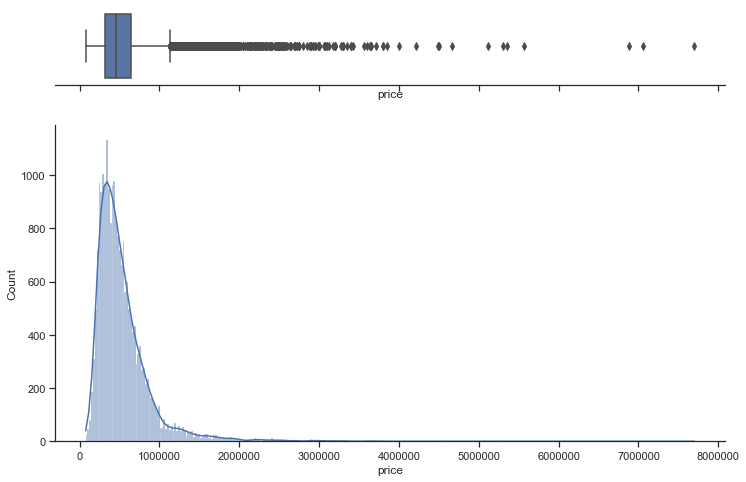

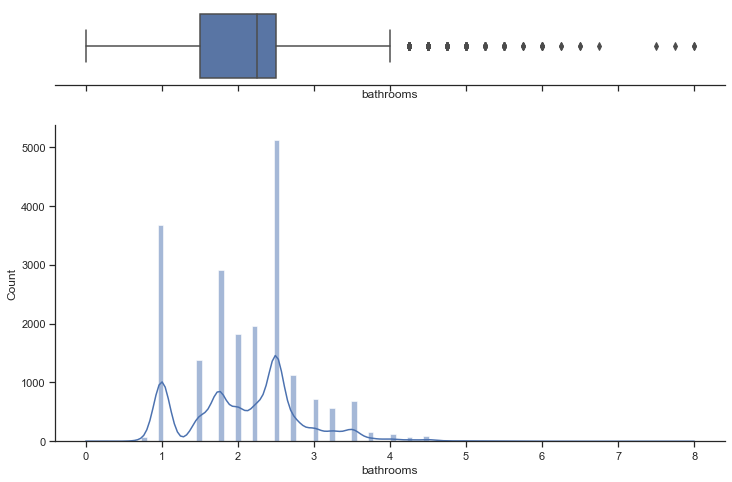

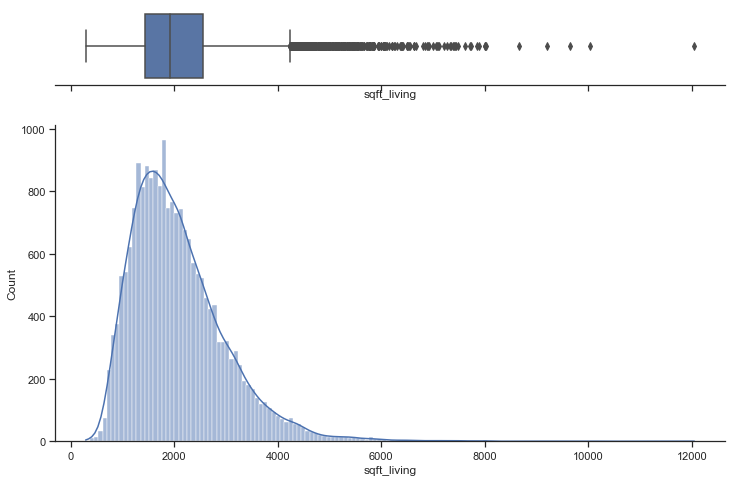

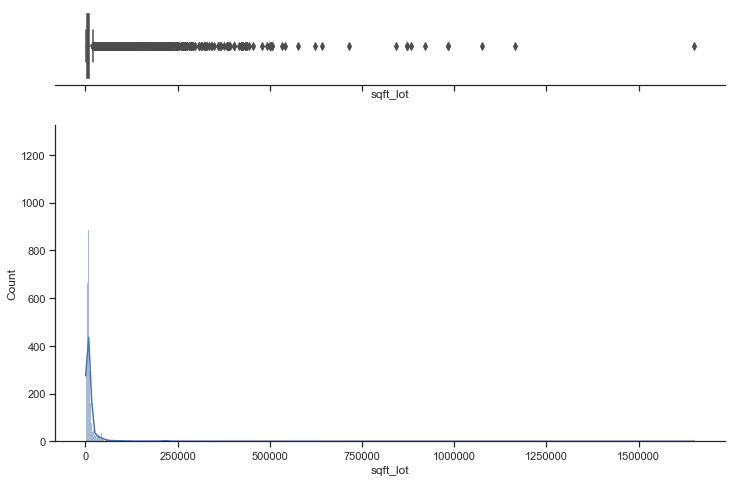

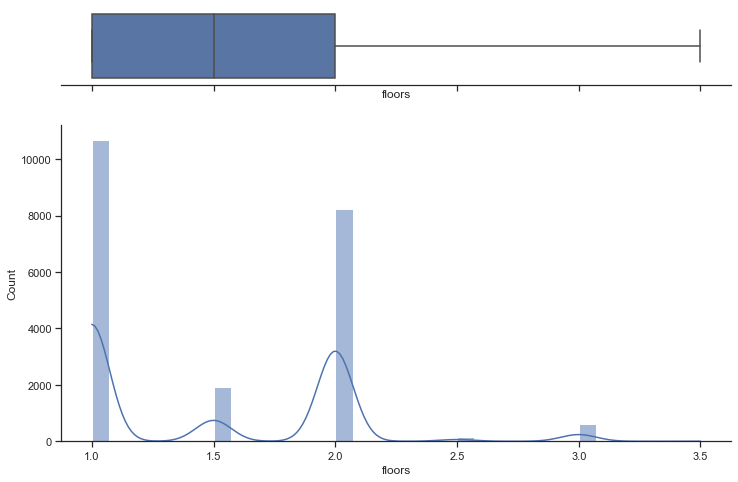

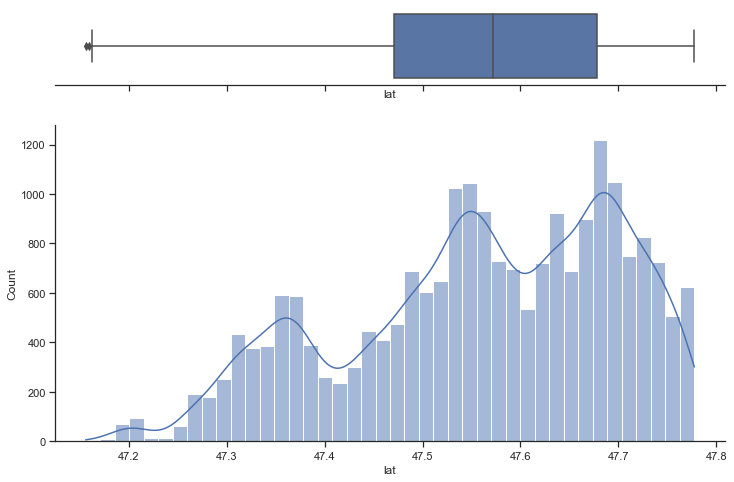

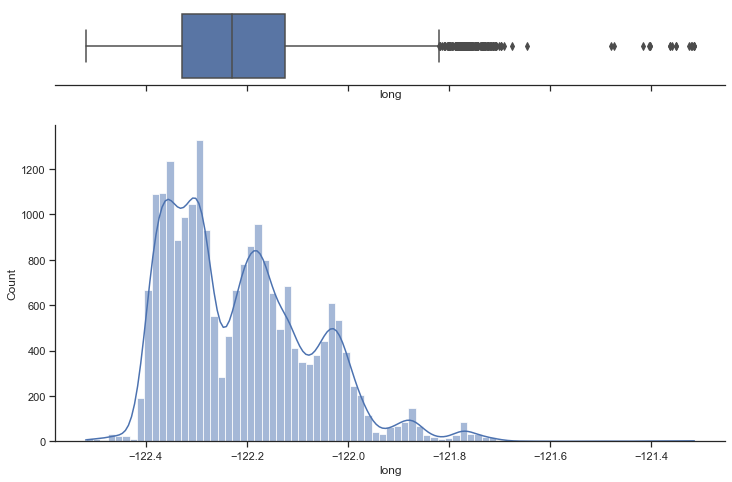

In [14]:
#Loop through attributes to display histograms and id outliers
for attribute in housesFloat.columns:
    sns.set(style="ticks")

    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                    gridspec_kw={"height_ratios": (.20, .80)}, figsize = (12, 8))

    sns.boxplot(x= housesFloat[attribute], ax=ax_box)
    sns.histplot(x = housesFloat[attribute], ax=ax_hist, kde=True)
    

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
 


In [15]:
houseSalesDF.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Clean, wrangle, and handle missing data

as we can see we have missing values for bedrooms, bathrooms, sqft_living, and sqft_lot.

In [16]:
# dropping unnecessary attributes
houseSalesDF.drop(columns=['id'],inplace=True)
houseSalesDF

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530.0,1131.0,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,2015-02-23,400000.0,4,2.50,2310.0,5813.0,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2014-06-23,402101.0,2,0.75,1020.0,1350.0,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,2015-01-16,400000.0,3,2.50,1600.0,2388.0,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Handling missing values


There are various methods to fix the missing values. We could fill them with mean, median, or mode,
which I think this is the best option. Another approach is to remove the rows that they contained with missing values.
There are other methods as well, which I think it's not necessary for this dataset. feel free to share your thoughts. 

# ss
nulls are around 5% of the data we may want to concder removing them, if we see in the histogram we have outliers



In [25]:
#Removing missing values
houseSalesDF = houseSalesDF.dropna(how='any')
houseSalesDF.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [47]:
# Extract year, month, and month year from the date
houseSalesDF["Year"] = pd.DatetimeIndex(houseSalesDF["date"]).year
houseSalesDF["Month"] = pd.DatetimeIndex(houseSalesDF["date"]).month
houseSalesDF['Month_Year'] = pd.to_datetime(houseSalesDF['date']).dt.to_period('M')
houseSalesDF.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month,Month_Year
0,2014-10-13,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,2014-10
1,2014-12-09,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,2014-12
2,2015-02-25,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,2015-02
3,2014-12-09,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,2014-12
4,2015-02-18,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,2015-02


In [26]:
sqft = houseSalesDF.loc[:,['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
sqft

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
0,1180.0,5650.0,1340,5650
1,2570.0,7242.0,1690,7639
2,770.0,10000.0,2720,8062
3,1960.0,5000.0,1360,5000
4,1680.0,8080.0,1800,7503
...,...,...,...,...
21608,1530.0,1131.0,1530,1509
21609,2310.0,5813.0,1830,7200
21610,1020.0,1350.0,1020,2007
21611,1600.0,2388.0,1410,1287


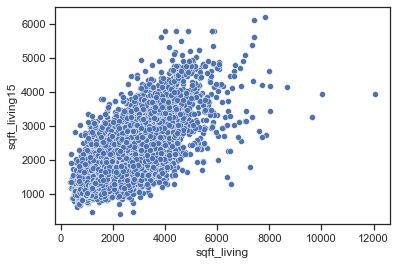

In [27]:
# what is the difference between sqft_living
sns.scatterplot(data=sqft, x=sqft['sqft_living'], y=sqft['sqft_living15'])

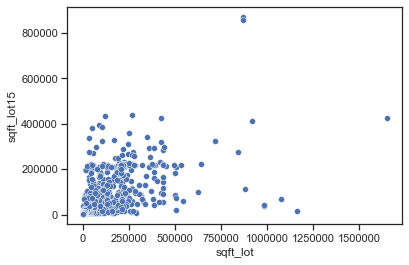

In [28]:
sns.scatterplot(data=sqft, x=sqft['sqft_lot'], y=sqft['sqft_lot15'])

In [29]:
sqft.corr()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15
sqft_living,1.000000,0.165686,0.757712,0.181731
sqft_lot,0.165686,1.000000,0.141718,0.722983
sqft_living15,0.757712,0.141718,1.000000,0.183964
sqft_lot15,0.181731,0.722983,0.183964,1.000000


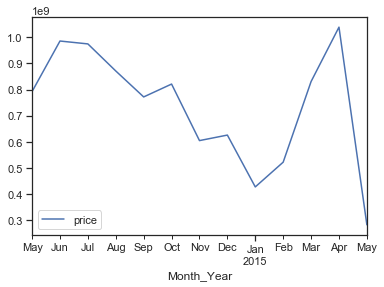

In [50]:
# Plotting Price rate versus month
month_year_group = houseSalesDF.groupby("Month_Year")['price'].sum().plot(legend=True)

Why we see a huge spike after Jan 2015 and lower prices after April 2015?

In [52]:
# Plot correlation Matrix Index
corr = houseSalesDF.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Year,Month
price,1,0.308095,0.528322,0.705356,0.0884842,0.260248,0.283986,0.404474,0.0330729,0.670242,0.607853,0.324357,0.0547358,0.127612,-0.0524103,0.308308,0.0226923,0.589529,0.0821795,0.00192045,-0.00957848
bedrooms,0.308095,1,0.514256,0.573338,0.0302257,0.179843,-0.00164556,0.0822269,0.026811,0.356103,0.474428,0.300471,0.157933,0.0203263,-0.154867,-0.00956978,0.130311,0.390485,0.0302084,-0.0130208,0.0025714
bathrooms,0.528322,0.514256,1,0.755995,0.0847133,0.503446,0.068368,0.185297,-0.124877,0.668163,0.687308,0.28055,0.5066,0.0538452,-0.208276,0.0277894,0.22694,0.571415,0.0869792,-0.0288272,0.0109134
sqft_living,0.705356,0.573338,0.755995,1,0.165686,0.360198,0.114123,0.285908,-0.0596212,0.765616,0.876517,0.432221,0.320739,0.0577235,-0.199072,0.0547347,0.238507,0.757712,0.181731,-0.0271978,0.0107511
sqft_lot,0.0884842,0.0302257,0.0847133,0.165686,1,-0.00116823,0.0237934,0.0691329,-0.0109472,0.108425,0.177583,0.0109986,0.0526028,0.00647082,-0.128649,-0.0812309,0.225905,0.141718,0.722983,0.00762575,-0.00322909
floors,0.260248,0.179843,0.503446,0.360198,-0.00116823,1,0.0242025,0.0296286,-0.261784,0.464855,0.531144,-0.247877,0.489959,0.00742316,-0.0702147,0.0464631,0.137463,0.287387,-0.00642266,-0.0239633,0.015838
waterfront,0.283986,-0.00164556,0.068368,0.114123,0.0237934,0.0242025,1,0.405368,0.0134882,0.0888472,0.0814189,0.0841922,-0.0255265,0.0835068,0.0305245,-0.0122951,-0.0416415,0.0927314,0.0295569,-0.00328416,0.00397269
view,0.404474,0.0822269,0.185297,0.285908,0.0691329,0.0296286,0.405368,1,0.0453907,0.252629,0.166125,0.28183,-0.0566638,0.0977425,0.0869632,0.0150306,-0.0849509,0.286076,0.0643428,0.000361352,-0.00535692
condition,0.0330729,0.026811,-0.124877,-0.0596212,-0.0109472,-0.261784,0.0134882,0.0453907,1,-0.14785,-0.160137,0.176321,-0.363592,-0.0609106,0.00795412,-0.0155459,-0.110318,-0.0948598,-0.00468931,-0.0486651,0.0235035
grade,0.670242,0.356103,0.668163,0.765616,0.108425,0.464855,0.0888472,0.252629,-0.14785,1,0.759375,0.1655,0.449694,0.0138946,-0.189627,0.117038,0.200737,0.716,0.119237,-0.0322156,0.00970481


As we can understand from the correlation matrix index, there is a significant association between the variables, that they have a darker box. Red box and light red is the indication of positive correlation, and blue and light blue is an indication of negative correlation. 

In [64]:
# Let's find out the correlation between price and other values
price_corr = houseSalesDF.corr()["price"].sort_values(ascending=False)
price_corrdf = price_corr.reset_index(name="corr")
price_corrdf.head(10)

,index,corr
0,price,1.000000
1,sqft_living,0.705356
2,grade,0.670242
3,sqft_above,0.607853
4,sqft_living15,0.589529
5,bathrooms,0.528322
6,view,0.404474
7,sqft_basement,0.324357
8,lat,0.308308
9,bedrooms,0.308095


In [72]:
# high correlation is between 0.7 - 1.0
high_price_corr = price_corrdf[price_corrdf["corr"] > 0.7]
high_price_corr.rename(columns={'index':'attribute'})

,attribute,corr
0,price,1.000000
1,sqft_living,0.705356


In [73]:
# Moderate correlation is between 0.5 - 0.7
moderate_price_corr = price_corrdf[(price_corrdf["corr"]>0.5) & (price_corrdf['corr']<0.7)]
moderate_price_corr.rename(columns={'index':'attribute'})

,attribute,corr
2,grade,0.670242
3,sqft_above,0.607853
4,sqft_living15,0.589529
5,bathrooms,0.528322


In [75]:
# Weak correlation is between 0.0 - 0.5
weak_price_corr = price_corrdf[(price_corrdf['corr']<0.5) & (price_corrdf['corr']>0)]
weak_price_corr.rename(columns={'index':'attribute'})

,attribute,corr
6,view,0.404474
7,sqft_basement,0.324357
8,lat,0.308308
9,bedrooms,0.308095
10,waterfront,0.283986
11,floors,0.260248
12,yr_renovated,0.127612
13,sqft_lot,0.088484
14,sqft_lot15,0.082180
15,yr_built,0.054736


In [76]:
# negative correlation is less than 0
negative_price_corr = price_corrdf[price_corrdf['corr'] < 0]
negative_price_corr.rename(columns={'index':'attribute'})

,attribute,corr
19,Month,-0.009578
20,zipcode,-0.052410
